In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

---
Exercise 1.
---

---
(a) and (b)
---

In [57]:
def min_size_for_majority(jury_size):
    if jury_size % 2 == 0:
        return (jury_size/2) + 1
    else:
        return np.ceil(jury_size/2)

def majority_vote_prob(jury_size, probability):
    min_size = min_size_for_majority(jury_size)
    cumulative_probability = binom.cdf(min_size-1, jury_size, probability)
    return 1-cumulative_probability

In [70]:
student_count = 19
STUDENT_PROBABILITY = 0.6

student_group_prob = majority_vote_prob(student_count, STUDENT_PROBABILITY)
print("The probability of correct decision based on majority voting among the medical students:", student_group_prob)

The probability of correct decision based on majority voting among the medical students: 0.8139079785845883


In [71]:
doctor_count = 3
DOCTOR_PROBABILITY = 0.8

doctor_group_prob = majority_vote_prob(doctor_count, DOCTOR_PROBABILITY)   
print("The probability of correct decision based on majority voting among the doctors:", doctor_group_prob)

The probability of correct decision based on majority voting among the doctors: 0.896


---
(c)
---

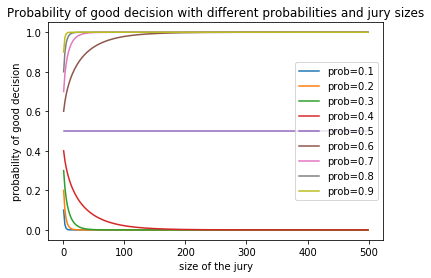

In [68]:
jury_sizes = range(1,500,2)
probabilities = np.round(np.linspace(0.1,0.9,9), 1)

for probability in probabilities:
    group_probabilities = [majority_vote_prob(jury_size,probability) for jury_size in jury_sizes]
    plt.plot(jury_sizes, group_probabilities, label='prob={}'.format(probability))

plt.title("Probability of good decision with different probabilities and jury sizes")
plt.xlabel("size of the jury")
plt.ylabel("probability of good decision")
plt.legend()
plt.show()

---
(d)
---

In [72]:
student_probs = []
while student_group_prob <= doctor_group_prob:
    student_count += 2
    student_group_prob = majority_vote_prob(student_count,STUDENT_PROBABILITY)
    student_probs.append([student_count,student_group_prob])    

print("The probability of correct deicision based on majority voting with {} students".format(student_probs[-2][0]),
      student_probs[-2][1])    
print("The probability of correct decision based on majority voting among the doctors:", doctor_group_prob)
print("The probability of correct deicision based on majority voting with {} students".format(student_probs[-1][0]),
      student_probs[-1][1])


The probability of correct deicision based on majority voting with 37 students 0.8920210536395459
The probability of correct decision based on majority voting among the doctors: 0.896
The probability of correct deicision based on majority voting with 39 students 0.8979413687105918


-----
Exercise 2.
-----

In [9]:
x1 = np.array([0.9, 0.1, 0.2, 0.8 ,0.1, 0.9])
x2 = np.array([0.0, 1.0, 0.0, 1.0, 0.0, 1.0])
x3 = np.array([0.9, 0.1, 0.9, 0.1, 0.0, 1.0])
x4 = np.array([0.9, 0.1, 0.9, 0.1, 0.3, 0.7])

data_points = np.array([x1,x2,x3,x4])

In [10]:
def compute_mean(data_point):
    class_a_mean = np.mean(data_point[::2])
    class_b_mean = np.mean(data_point[1::2])
    return [class_a_mean, class_b_mean]

In [11]:
def compute_max(data_point):
    class_a_max = np.max(data_point[::2])
    class_b_max = np.max(data_point[1::2])
    return [class_a_max, class_b_max]

In [12]:
def compute_min(data_point):
    class_a_min = np.min(data_point[::2])
    class_b_min = np.min(data_point[1::2])
    return [class_a_min, class_b_min]

In [13]:
def compute_product(data_point):
    class_a_product = np.prod(data_point[::2])
    class_b_product = np.prod(data_point[1::2])
    return [class_a_product, class_b_product]

In [14]:
def compute_results(data_points, mode):
    computed_values = []
    results = np.empty((4,), dtype=np.str)
    if mode == 'mean':
        for data_point in data_points: 
            mean = compute_mean(data_point)
            computed_values.append(mean)
    elif mode == 'max':
        for data_point in data_points: 
            maxvalue = compute_max(data_point)
            computed_values.append(maxvalue)
    elif mode == 'min':
        for data_point in data_points: 
            minvalue = compute_min(data_point)
            computed_values.append(minvalue)
    elif mode == 'product':
        for data_point in data_points: 
            product = compute_product(data_point)
            computed_values.append(product)
    else:
        print("The mode given is incorrect.")
        return None
    
    computed_values = np.asarray(computed_values)
    results[computed_values[:,0] > computed_values[:,1]] = 'a' 
    results[computed_values[:,0] < computed_values[:,1]] = 'b'
    results[computed_values[:,0] == computed_values[:,1]] = 't'
    return results

In [15]:
print("Mean results: ",compute_results(data_points,'mean'))
print("Max results: ",compute_results(data_points,'max'))
print("Min results: ",compute_results(data_points,'min'))
print("Product results: ",compute_results(data_points,'product'))

Mean results:  ['b' 'b' 'a' 'a']
Max results:  ['t' 'b' 'b' 'a']
Min results:  ['t' 'b' 'b' 'a']
Product results:  ['b' 'b' 'b' 'a']


-----
Exercise 3.
-----

---
(a)
--

In [16]:
WEAK_CLASSIFIER_COUNT = 10
WEAK_CLASSIFIER_PROB = 0.6
STRONG_CLASSIFIER_PROB = 0.85

In [17]:
first_case = majority_vote_prob(WEAK_CLASSIFIER_COUNT,WEAK_CLASSIFIER_PROB) * (1-STRONG_CLASSIFIER_PROB)
second_case = (1-binom.cdf(4,WEAK_CLASSIFIER_COUNT,WEAK_CLASSIFIER_PROB)) * (STRONG_CLASSIFIER_PROB)

print("The probability of good decision with the combined prediction:",first_case + second_case)

The probability of good decision with the combined prediction: 0.80366266368


---
(b)
---

In [24]:
def weighted_majority(strong_classifier_weight):
    total_votes = np.floor(WEAK_CLASSIFIER_COUNT + strong_classifier_weight)
    if  10 <= total_votes < 20:
        #first case
        min_weak_size = min_size_for_majority(total_votes)
        weak_prob = (1 - binom.cdf(min_weak_size-1,WEAK_CLASSIFIER_COUNT, WEAK_CLASSIFIER_PROB))
        first_case_prob = weak_prob * (1-STRONG_CLASSIFIER_PROB)
        #second case
        min_weak_size = min_weak_size - np.floor(strong_classifier_weight)
        weak_prob = (1 - binom.cdf(min_weak_size-1,WEAK_CLASSIFIER_COUNT, WEAK_CLASSIFIER_PROB))
        second_case_prob = weak_prob * STRONG_CLASSIFIER_PROB
        return first_case_prob + second_case_prob
    elif total_votes == 20:
        min_weak_size = 1
        weak_prob = (1-binom.cdf(min_weak_size-1, WEAK_CLASSIFIER_COUNT, WEAK_CLASSIFIER_PROB))
        return weak_prob * STRONG_CLASSIFIER_PROB
    elif total_votes > 20:
        return STRONG_CLASSIFIER_PROB
    else:
        print("Negative weight not allowed.")
        return None

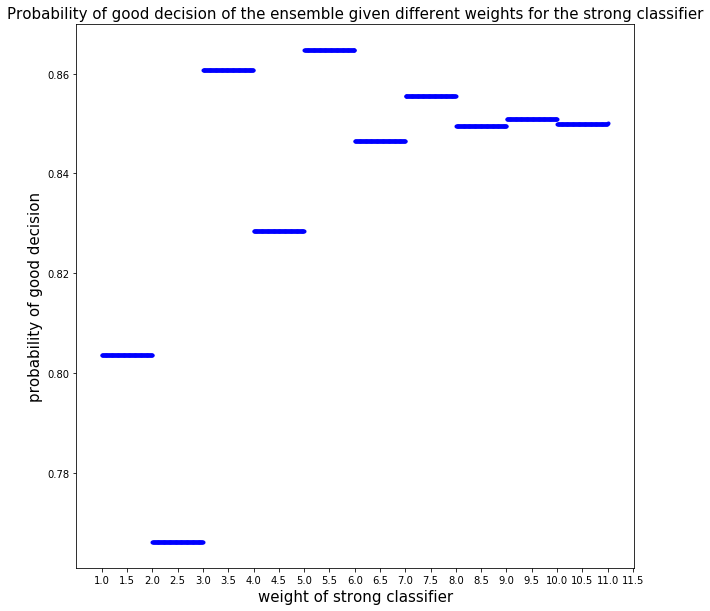

In [80]:
weights = np.linspace(1.0,11.0,1100)
    
def plot_results(weights):
    plt.figure(figsize = (10,10))
    for weight in weights:
        prob = weighted_majority(weight)
        if prob != None:
            plt.scatter(weight,prob, marker = '.', c = 'blue')
    plt.title("Probability of good decision of the ensemble given different weights for the strong classifier",fontsize = 15)
    plt.xlabel("weight of strong classifier", fontsize = 15)
    plt.ylabel("probability of good decision", fontsize = 15)
    plt.xticks(np.arange(min(weights), max(weights)+1, .5))
    plt.show()
    
plot_results(weights)    

---
(c)
---

In [ ]:
def compute_weight(error):
    return np.log((1-error) / error)   

In [74]:
weak_expected_error = 1 - WEAK_CLASSIFIER_PROB
strong_expected_error = 1 - STRONG_CLASSIFIER_PROB

weak_weight = compute_weight(weak_expected_error)
strong_weight = compute_weight(strong_expected_error)


print("The weight of the strong classifier calculated by the AdaboostM1 algorithm: ",strong_weight)
print("The weight of the weak classifier calcualted by the AdaboostM1 algorithm: ",weak_weight)

The weight of the strong classifier calculated by the AdaboostM1 algorithm:  1.7346010553881064
The weight of the weak classifier calcualted by the AdaboostM1 algorithm:  0.4054651081081642


---
(d)
---

In [53]:
def plot_weights(errors):
    updated_weights = []
    for error in errors:
        updated_weight = compute_weight(error)
        updated_weights.append(updated_weight)
    plt.figure(figsize=(10,10))
    plt.plot(errors,updated_weights,'--o', label = 'error-weight curve')
    plt.title("The assigned weights given different error rates", fontsize = 20)
    plt.xlabel("error rate", fontsize = 20)
    plt.ylabel("assigned weight", fontsize = 20)
    plt.legend(fontsize =  20)
    plt.show()

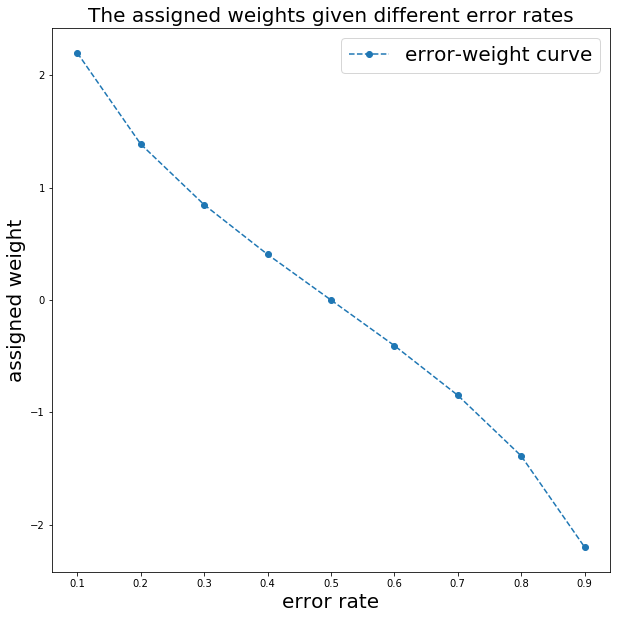

In [54]:
errors = np.linspace(0.1,0.9,9)
plot_weights(errors)